# Планирование рекламной кампании интернет-магазина

**План:**  
1. [Изучить данные.](#info)
2. [Предобработать данные:](#pp)
   - обработать пропуски;
   - удалить дубликаты;
   - изменить типы данных.
3. [Проанализировать данные:](#an)
   - построить графики.
4. [Составить портрет пользователя:](#user)
   - изучить популярные платформы у игроков из разных регионов;
   - изучить популярные жанры у игроков из разных регионов;
   - проверить, влияет ли возрастной рейтинг на продажи.
5. [Выдвинуть и проверить гипотезы.](#hyps)
6. [Написать вывод.](#conclude)

Перед нами стоит задача изучить данные о видеоиграх, выявить определяющие успешность игры закономерности и спланировать рекламную кампанию на 2017 год. Начнём с изучения набора данных и информации о нём.

<a id='info'></a>

## Изучаем данные

Импортируем нужные для работы библиотеки.

In [1]:
import pandas as pd # нужна для работы с датасетом
import numpy as np # понадобится для работы с числами
from scipy import stats as st # для проверки гипотез
import seaborn as sns # для визуализации данных
%matplotlib inline
%config InlineBackend.figure_format='retina' # повышаем четкость графиков
import matplotlib.pyplot as plt # для построения графиков
plt.style.use('seaborn-darkgrid') # установим стиль графиков

Прочитаем файл с датасетом.

In [2]:
data = pd.read_csv('/datasets/games.csv')

Посмотрим на общую информацию о данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

Из общей информации видно несколько проблем: 
 - названия столбцов написаны с использованием прописных букв;
 - данные с пользовательским рейтингом имеют неправильный тип;
 - в столбце с названием игры есть 2 пропуска;
 - в столбцах с рейтингом критиков, игроков и возрастным рейтингов до половины значений пропущены;
 - в каждом из регионов как минимум у четверти всех игр нулевые продажи.  
  
В следующих этапах работы попробуем избавиться от некоторых проблем.

<a id='pp'></a>

## Предобработка данных

Сразу же сделаем все буквы в названиях столбцов строчными.

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

Данные в столбце `user_score` имеют строковый тип, хотя в нём записаны числа. Посмотрим, какие данные, кроме чисел, в нём есть.

In [7]:
data['user_score'].value_counts().head()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64

Оказывается, кроме чисел и пропусков есть ещё записи **tbd**, т.е. *to be determined* — «ещё не определён», и их почти 2.5 тысячи. Посмотрим на некоторые строки и попробуем увидеть закономерность появления такой записи.

In [8]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [9]:
data.query('user_score=="tbd" and jp_sales!=0')['user_score'].count()

82

Нет явной закономерности, по которой присваивалось это значение. Посмотрим, есть ли игры с нулевым рейтингом, и если нет, присвоим играм с неопределенным рейтингом рейтинг 0, чтобы отличать их в общей массе.

In [10]:
data.query('user_score=="0" or user_score=="0.0"')['user_score'].count()

1

Всего одно значение из более чем 16 тысяч. Присвоим играм с неопределенным рейтингом нулевой рейтинг.

In [11]:
data.loc[data['user_score']=='tbd', 'user_score'] = '0'

Поменяем тип данных на числовой.

In [12]:
data['user_score'] = data['user_score'].astype(float)

Проверим, что все типы данных теперь правильные.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Все типы данных теперь в порядке. Теперь обработаем пропуски.

In [14]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Посмотрим, сколько останется данных, если удалить все пропуски.

In [15]:
data.dropna().shape[0]

7878

Заполним пропуски в столбце с рейтингом значением `NaN`, чтобы отличать их при построении графиков.

In [16]:
data['rating'] = data['rating'].fillna('NaN')

Другие пропуски заполнять не станем, потому что каждая строка — это уникальная игра, и вряд ли получится достаточно точно заменить пропуски на типичные значения. Удалять строки также не будем, потому что даже у двух игр без названия и жанра всё равно есть данные о продажах, которые пригодятся нам для построения графиков. А удалить строки с пропусками — значит, потерять больше половины всех данных, многие из которых могут быть полезны в анализе.  
  
Номер года придётся оставить с типом данных float, потому что целочисленный тип не поддерживает пропуски. Пропуски в данных о годе выпуска можно заполнить по открытым источникам.

При помощи цикла посчитаем суммарные продажи по всем регионам.

In [17]:
total_sales = 0 # создадим переменную с суммой продаж
for column in data.columns: # переберём все столбцы датасета
    if 'sales' in column: # выберем только те, в которых содержится информация о проданных копиях
        total_sales += data[column] # сложим их значения вместе в переменной с суммарными продажами
        data['total_sales'] = total_sales # создадим новый столбец с суммарными продажами

Проверим, что функция сработала правильно.

In [18]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


### Вывод

Данные приведены к нужным типам, названия столбцов теперь более удобные для работы, пропуски оставлены без изменений. Если для каких-то подсчётов нужны будут «чистые» данные, создадим срезы без пропусков для каждого случая.

<a id='an'></a>

## Проанализируем данные

Посмотрим на распределение игр по годам выпуска.

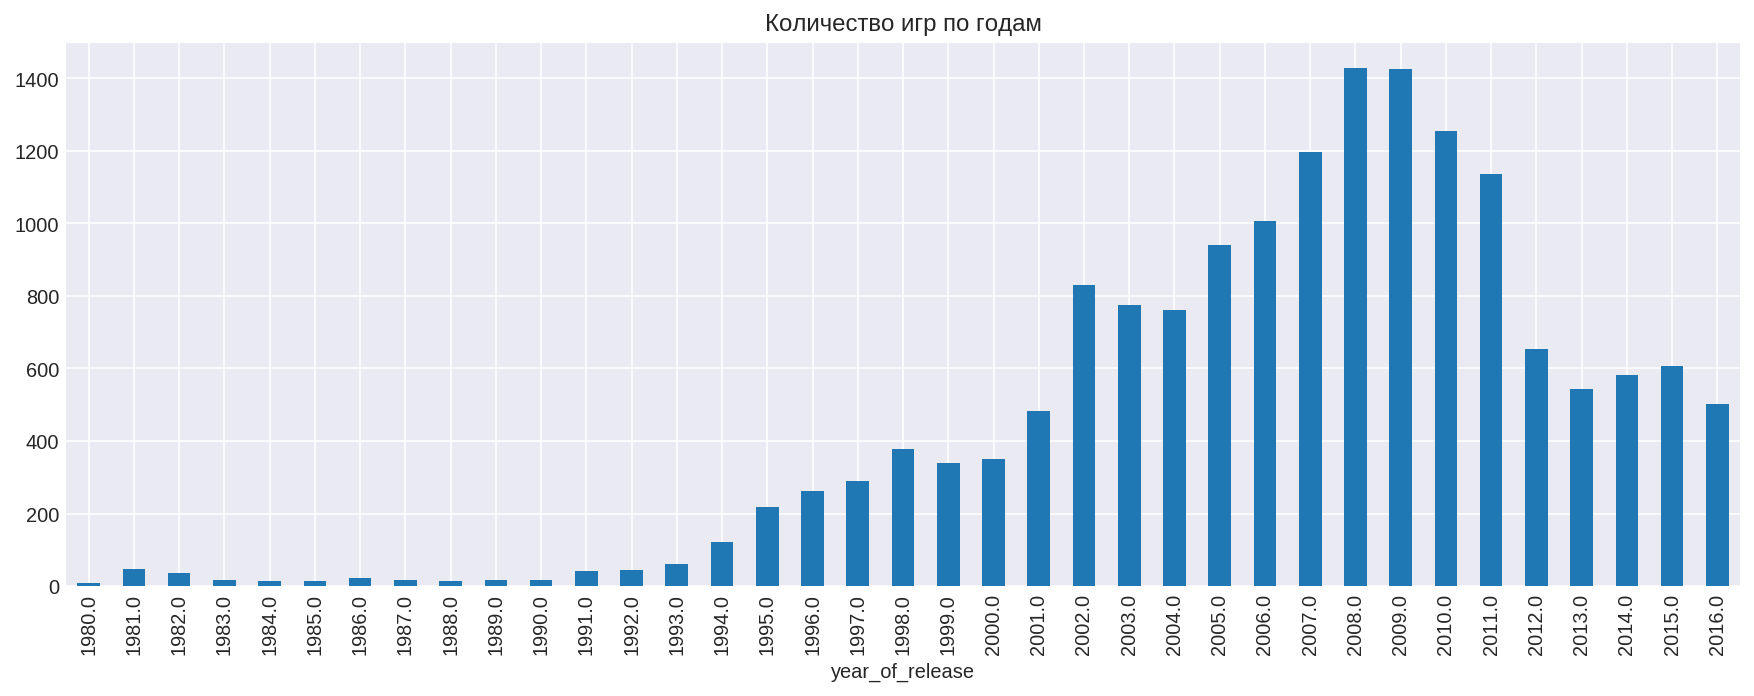

In [19]:
(
    data
    .groupby('year_of_release')['year_of_release']
    .count()
    .plot(
        kind='bar',
        figsize=(15,5),
        title='Количество игр по годам'
    )
);

In [20]:
data.query('year_of_release<1994').shape[0]

367

В датасете довольно мало игр, выпущенных до 1994 года. Этот период не так важен для анализа, и его можно не учитывать при анализе продаж по годам.

In [21]:
latest = data.query('year_of_release>=1994')

Для построения графика продаж для каждой платформы по годам выделим 10 с самыми высокими продажами.

In [22]:
top10_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top10_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

Теперь построим график продаж игр на разных платформах по годам.

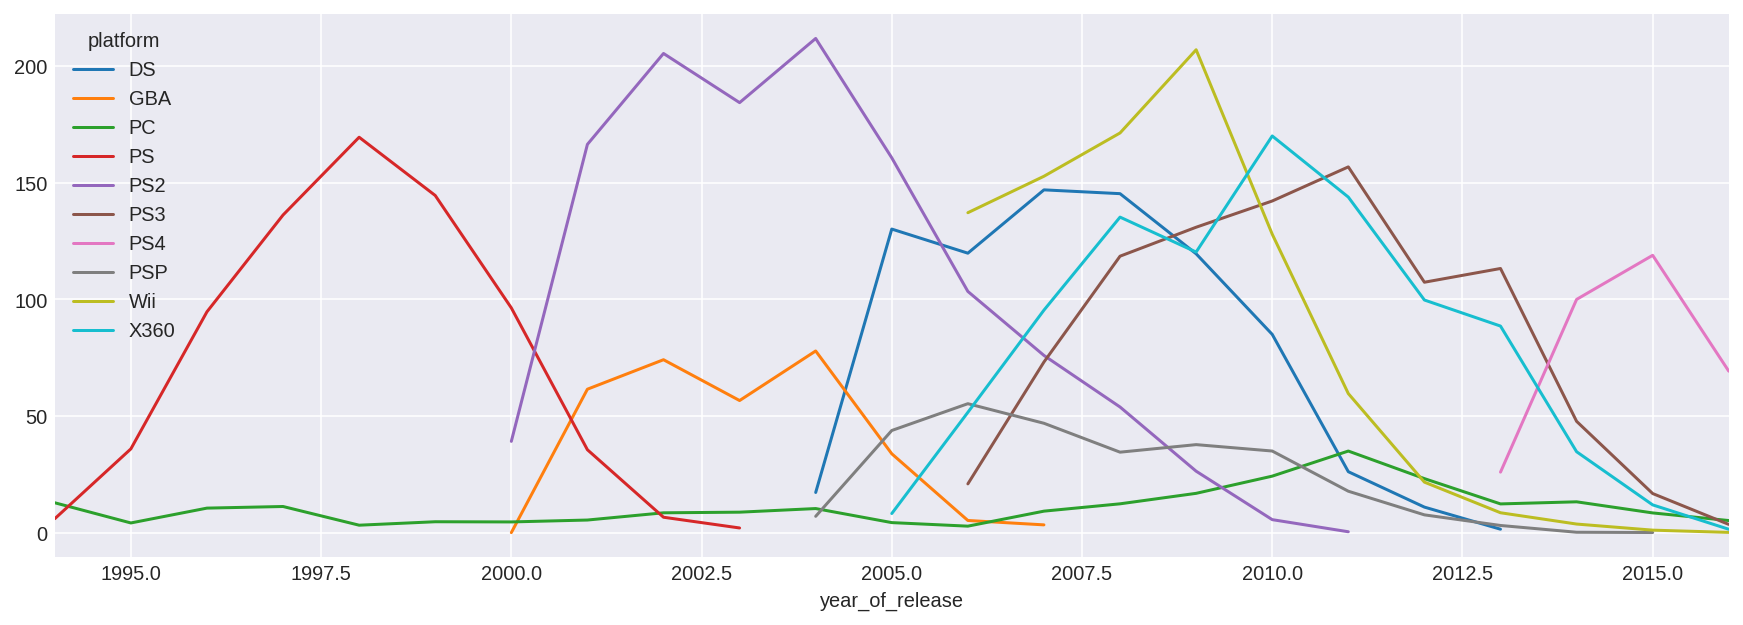

In [23]:
(
    latest
    .query('platform in @top10_platform.index') # возьмем только топ-10 платформ по продажам
    .pivot_table( # соберем сводную таблицу
        index='year_of_release', # в качестве индексов передадим годы выпуска
        columns='platform', # столбцов — платформы из топа-10
        values='total_sales', #значений — продажи
        aggfunc='sum' # на графике мы хотим увидеть сумму продаж по годам
    )
    .plot(figsize=(15,5)) # построим график по полученной таблице
);

Из графика видно, что цикл жизни каждой платформы (кроме ПК) — около 10 лет. Продажи сначала довольно резко растут, но затем постепенно сходят на нет. Не имеет смысла рекламировать игры для платформы прошлого поколения.

За **актуальный период** стоит принять данные с 2013 года, когда появились платформы нового поколения — **PS4 и XBOX One.**

In [24]:
latest = data.query('year_of_release>=2013')

Снова посмотрим на график продаж игр для каждой платформы по годам (теперь со всеми платформами).

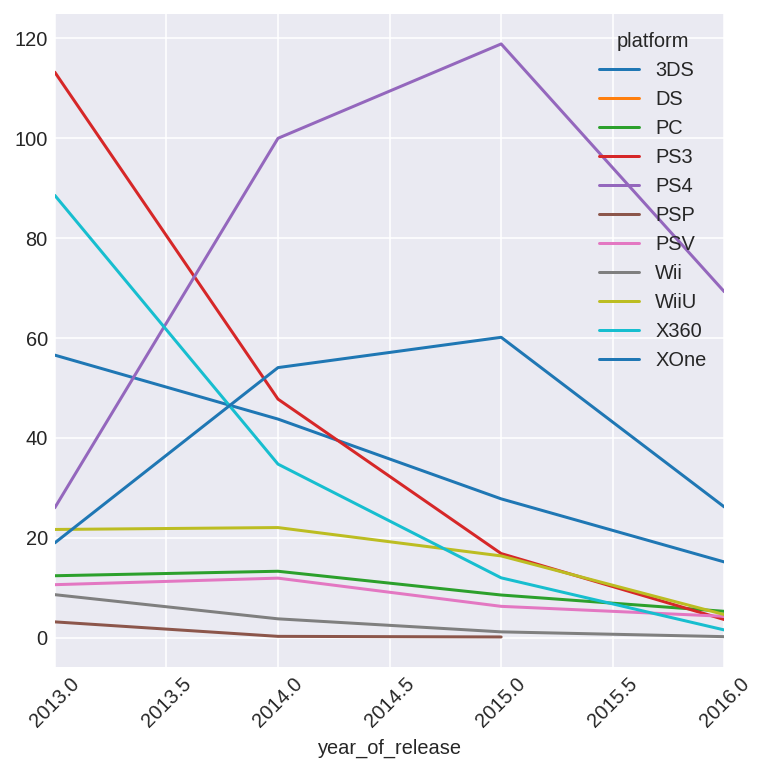

In [25]:
(
    latest
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum'
    )
    .plot(figsize=(6,6), rot=45)
);

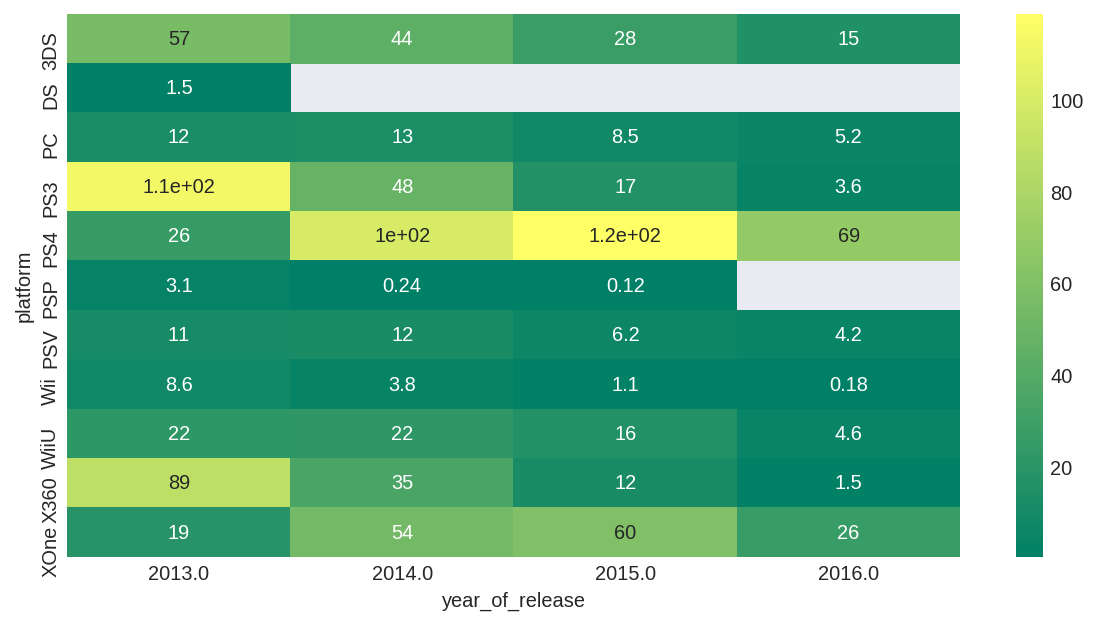

In [52]:
plt.figure(figsize=(10,5))
latest_heat = latest.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc='sum')
sns.heatmap(latest_heat, annot=True, cmap='summer');

Данные для 2016 года явно неполные, поэтому все платформы показывают сильное падение продаж. По данным до 2015 года включительно видно, что самыми быстрорастущими платформами на рынке стали как раз платформы нового поколения. Остальные показывают снижение продаж или просто стабильно низкие продажи. К двум очевидно перспективным прибавим те, продажи которых стабильны. Это **ПК, 3DS, WiiU и PS Vita.**

In [27]:
top_platforms_list = ['PS4', 'XOne', 'PC', 'WiiU', 'PSV', '3DS']
top_platforms = latest.query('platform in @top_platforms_list')

Построим диаграмму размаха для 6 наших платформ.

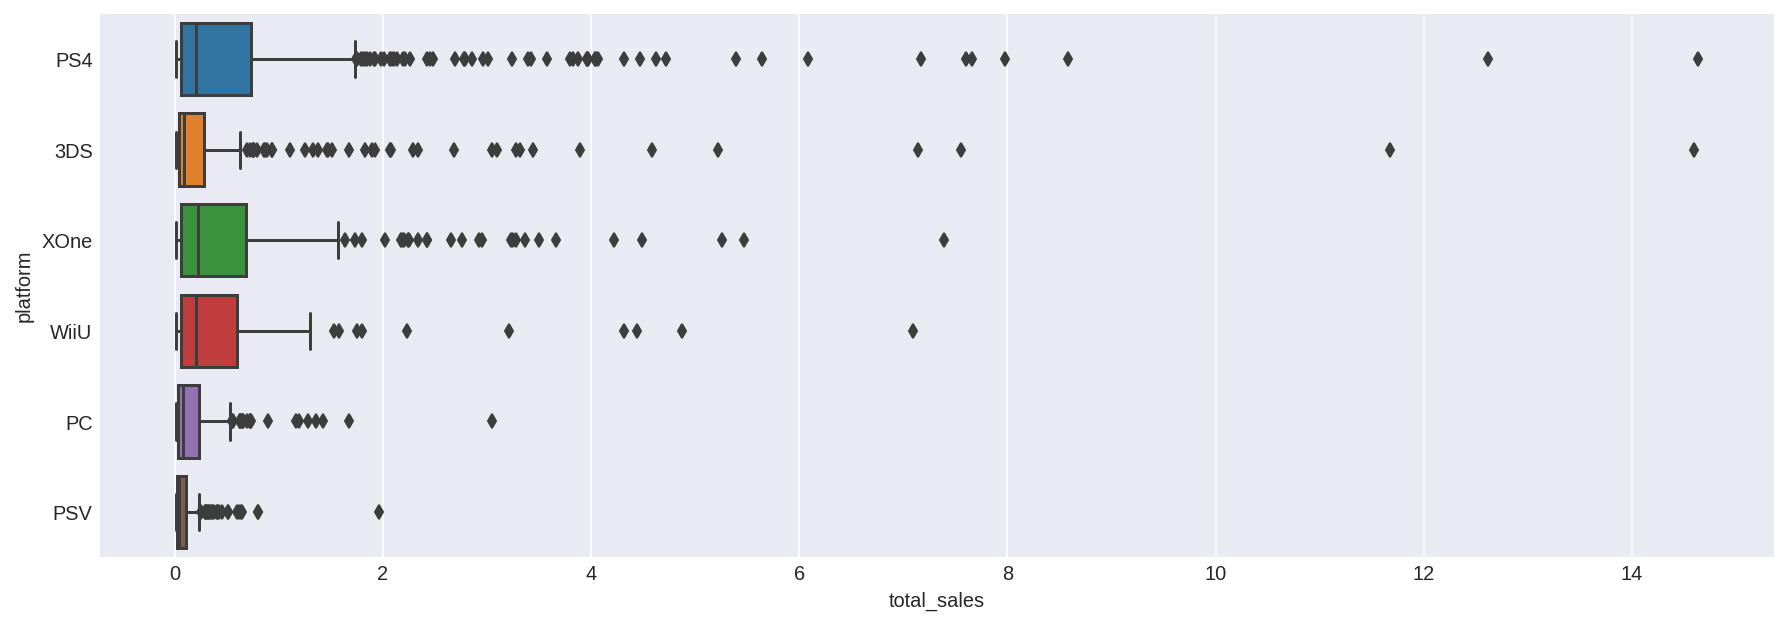

In [28]:
fig1 = plt.figure(figsize=(15,5))
sns.boxplot(x='total_sales', y='platform', data=top_platforms);

В целом диаграмма размаха показывает, что мы сделали правильный выбор. Продажи первых четырех приставок довольно высоки и есть много игр, которые продаются очень большим тиражом (выбросы в виде ромбов).
  
А вот продажи игр на **PS Vita** довольно низкие по сравнению с остальными платформами. Учитывая, что платформа не новая, можно убрать её из нашего набора. ПК убирать не станем, потому что эта платформа достаточно стабильна, и хоть и не показывает взрывного роста продаж, но и не снижается до маленьких значений.

In [29]:
top_platforms = top_platforms.query('"PSV" not in platform')

Ещё раз посмотрим на диаграмму размаха, но ограничим показатель суммарных продаж 1 миллионом копий.

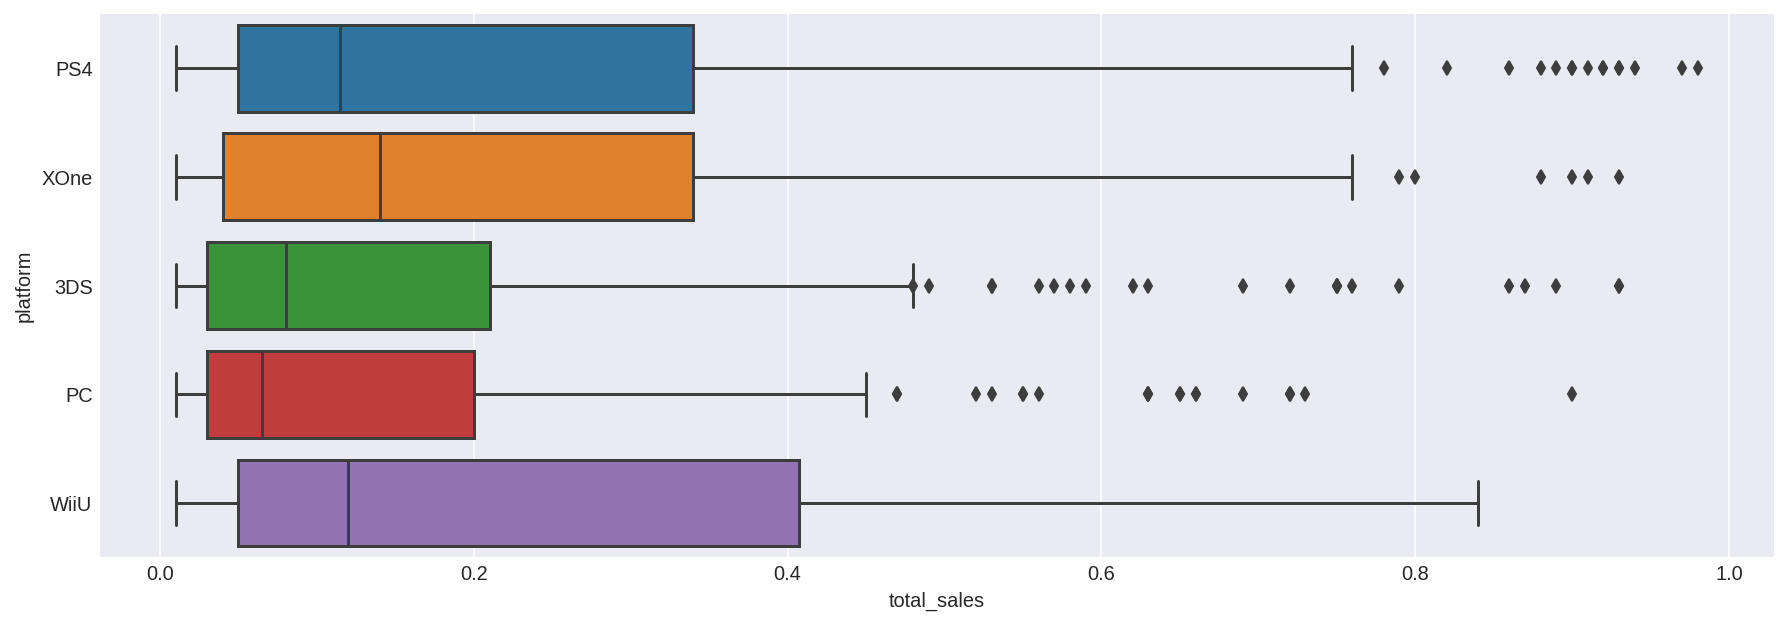

In [30]:
fig2 = plt.figure(figsize=(15,5))
sns.boxplot(x='total_sales', y='platform', data=top_platforms.query('total_sales<1'));

1. Больше половины игр на приставки продаются тиражом больше 100 тысяч копий.
2. Игры на приставки нового поколения (PS и XBOX) продаются очень похоже: совпали 75%-е квартили и правые «усы», а также очень близко друг к другу расположились 25%-е квартили и медианы.
3. Продажи игр на WiiU в целом похожи на продажи игр на другие приставки, но они чуть выше. Скорее всего, это ненадолго, потому что две другие приставки новее, и продажи игр на них будут расти, а на WiiU, наоборот, снижаться.
4. Игры на ПК продаются хуже, зато эта платформа актуальна всегда.

Посмотрим на график рассеяния продаж в зависимости от оценок игроков и критиков внутри одной платформы. Учитывая, что в будущем нам нужно будет рассмотреть все платформы, напишем функцию.

In [31]:
def double_scatter(platform): # функция принимает название платформы
    platform_sales = top_platforms.query('platform==@platform') # делаем срез по указанной платформе   
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5)) # создаем фигуру с двумя областями рисования
    fig.suptitle(platform, fontsize=20, fontweight='bold') # подписываем фигуру
    axes[0].set_title('Продажи / Оценка критиков', color='steelblue') # именуем левый график
    axes[0].scatter(x='critic_score', y='total_sales', data=platform_sales, alpha=0.5) # строим график рассеяния
    axes[1].set_title('Продажи / Оценка игроков', color='forestgreen') # именуем правый график
    axes[1].scatter(x='user_score', y='total_sales', data=platform_sales, alpha=0.5); # строим график рассеяния
    print(platform)
    display(platform_sales[['total_sales', 'critic_score', 'user_score']].corr()) # выводим матрицу корреляции

PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,0.023279
critic_score,0.406568,1.000000,0.520752
user_score,0.023279,0.520752,1.000000


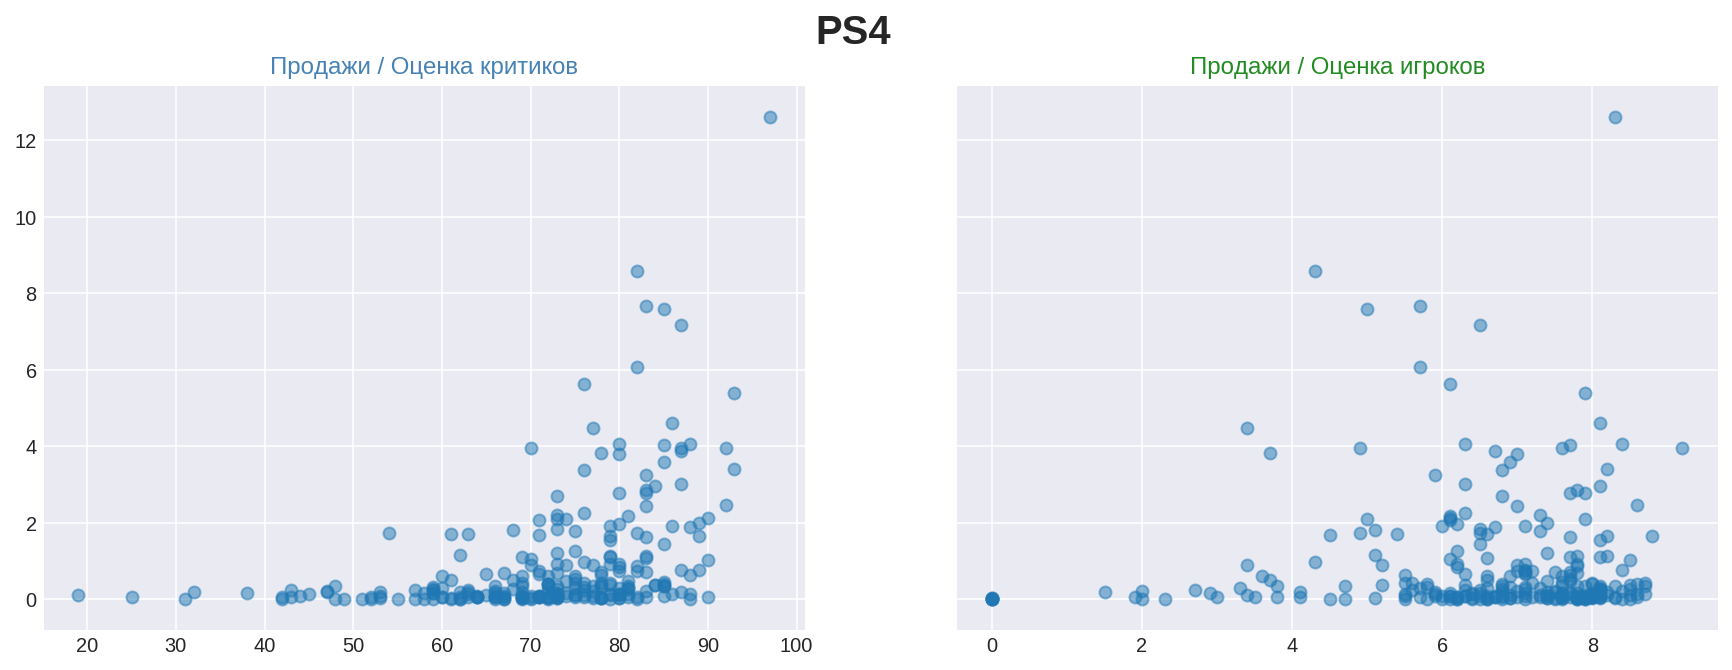

In [32]:
double_scatter('PS4')

Из графиков видно, что оценки критиков довольно сильно влияют на продажи игр на PS4. После 60 баллов виден рост числа проданных копий. В то же время от оценок игроков продажи зависят, но не так сильно: есть несколько игр с оценками от 4 до 6 баллов, проданные в  количестве от 6 до 9 миллионов копий. Тем не менее зависимость, пусть и не такая сильная, есть. Отдельно стоит обратить внимание на игры с пользовательским рейтингом 0: это игры с неопределенным рейтингом, которым мы ранее присвоили нулевую оценку. Как видно, у всех них почти нулевые продажи. Возможно, агрегаторы выставляют рейтинг только после определённого количества оценок, а эти игры получили мало оценок от игроков.  
  
По матрице корреляции также видно, что связь продаж и оценок критиков сильнее, чем связь продаж и оценок игроков. Более того, корреляция продаж и пользовательского рейтинга очень низкая — около 0.02. Связь продаж и рейтинга критиков намного выше, но меньше 0.5, значит, связь не так сильна, как кажется.

Теперь рассмотрим остальные платформы.

PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,0.023279
critic_score,0.406568,1.000000,0.520752
user_score,0.023279,0.520752,1.000000


3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.336750
critic_score,0.357057,1.000000,0.651067
user_score,0.336750,0.651067,1.000000


XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,0.074486
critic_score,0.416998,1.000000,0.465368
user_score,0.074486,0.465368,1.000000


WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.376415,0.361548
critic_score,0.376415,1.000000,0.576628
user_score,0.361548,0.576628,1.000000


PC


,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.024991
critic_score,0.196030,1.000000,0.429562
user_score,-0.024991,0.429562,1.000000


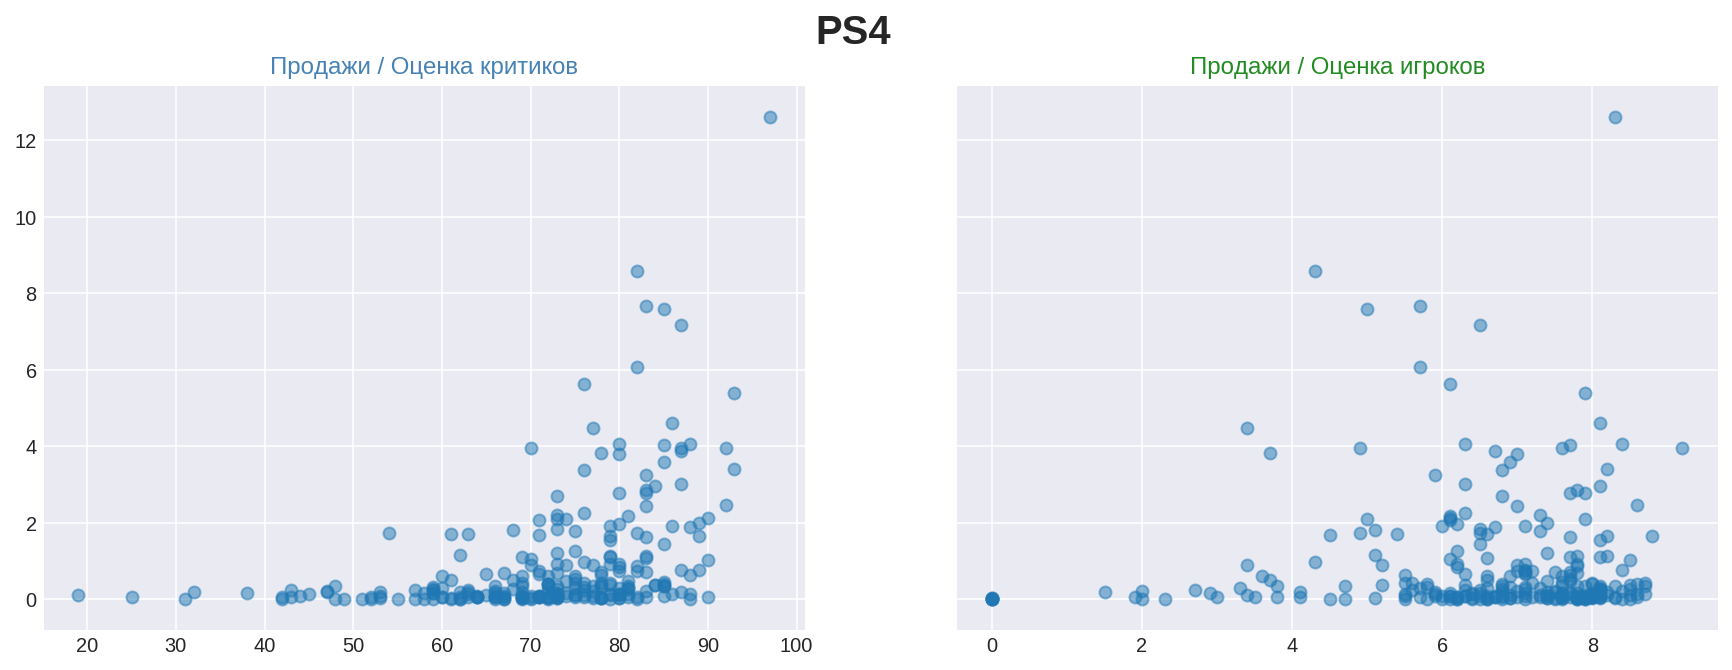

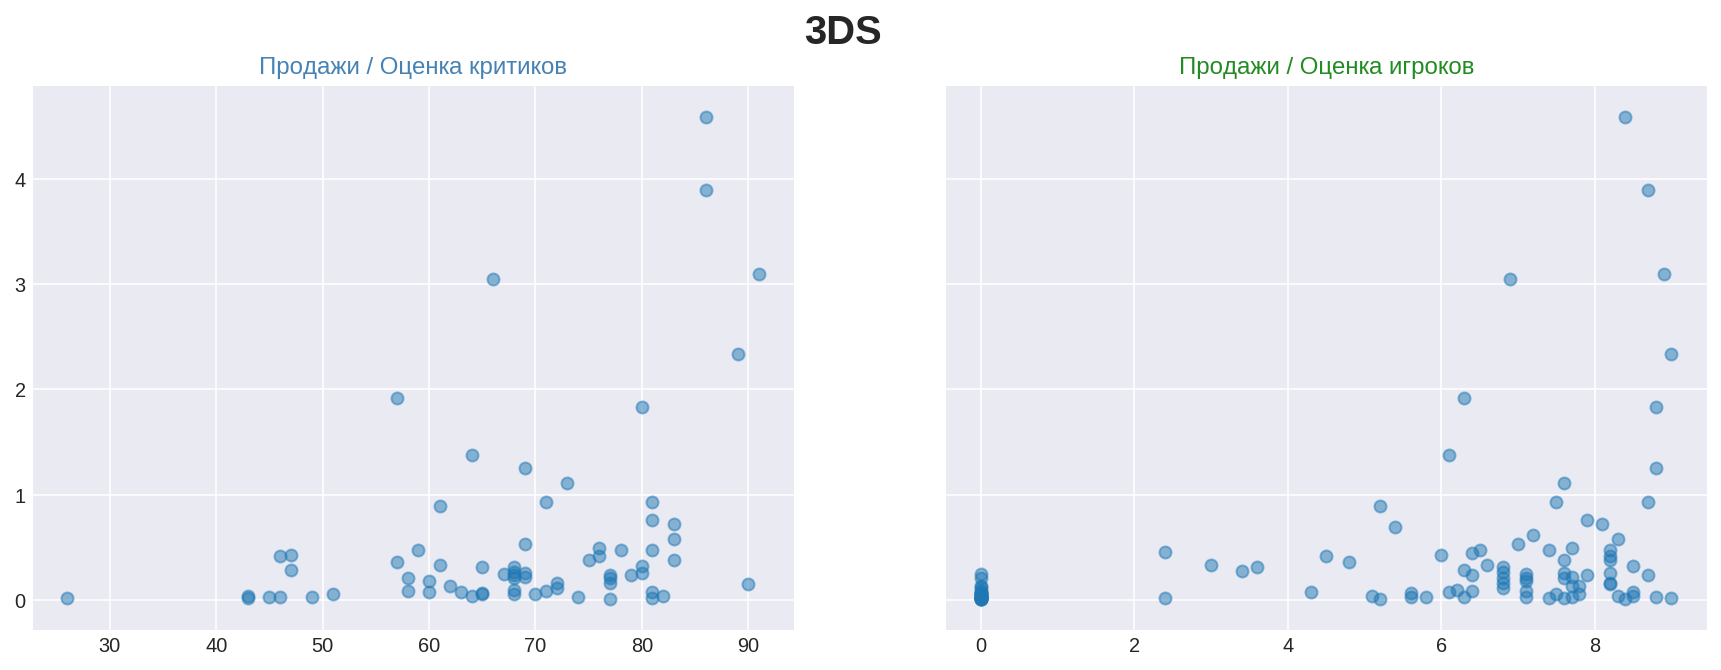

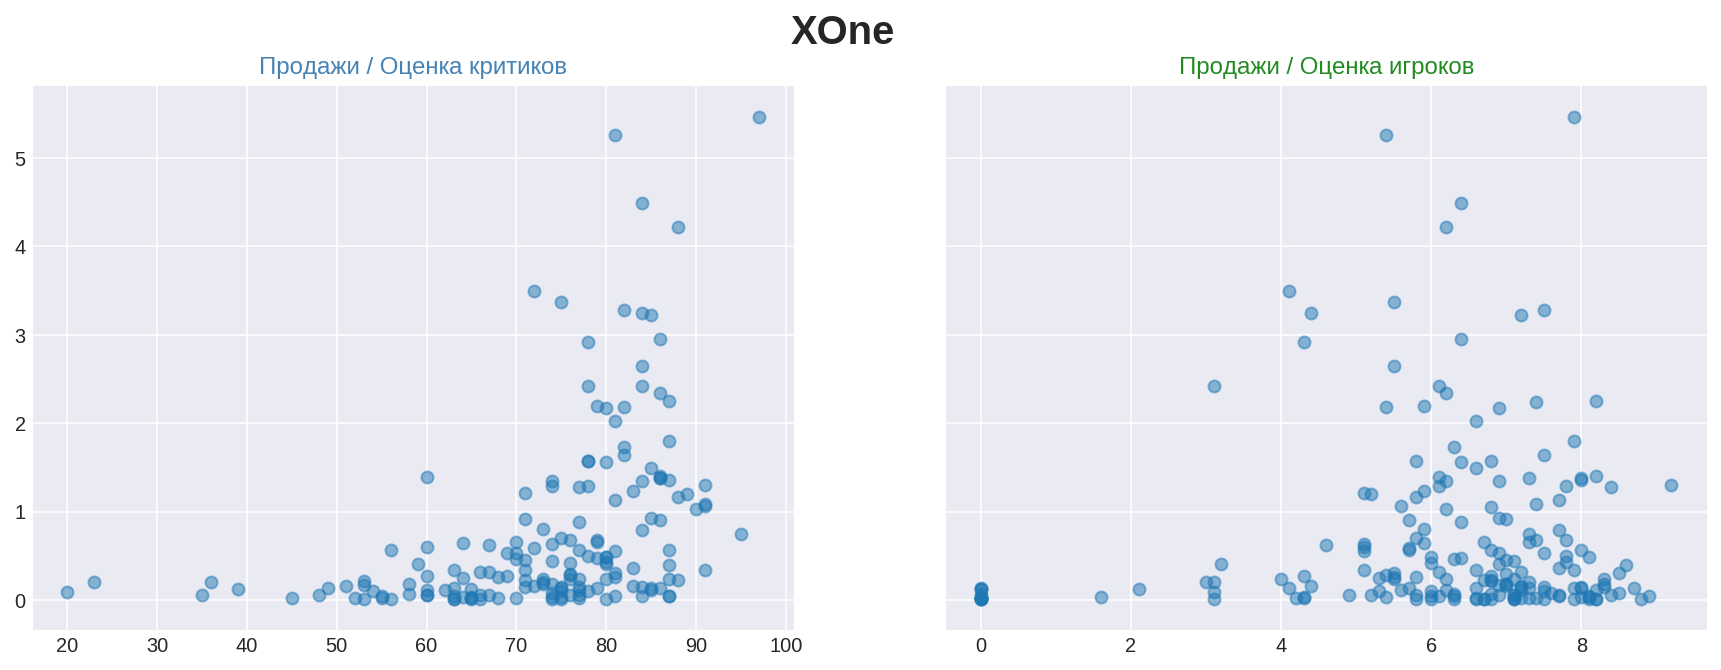

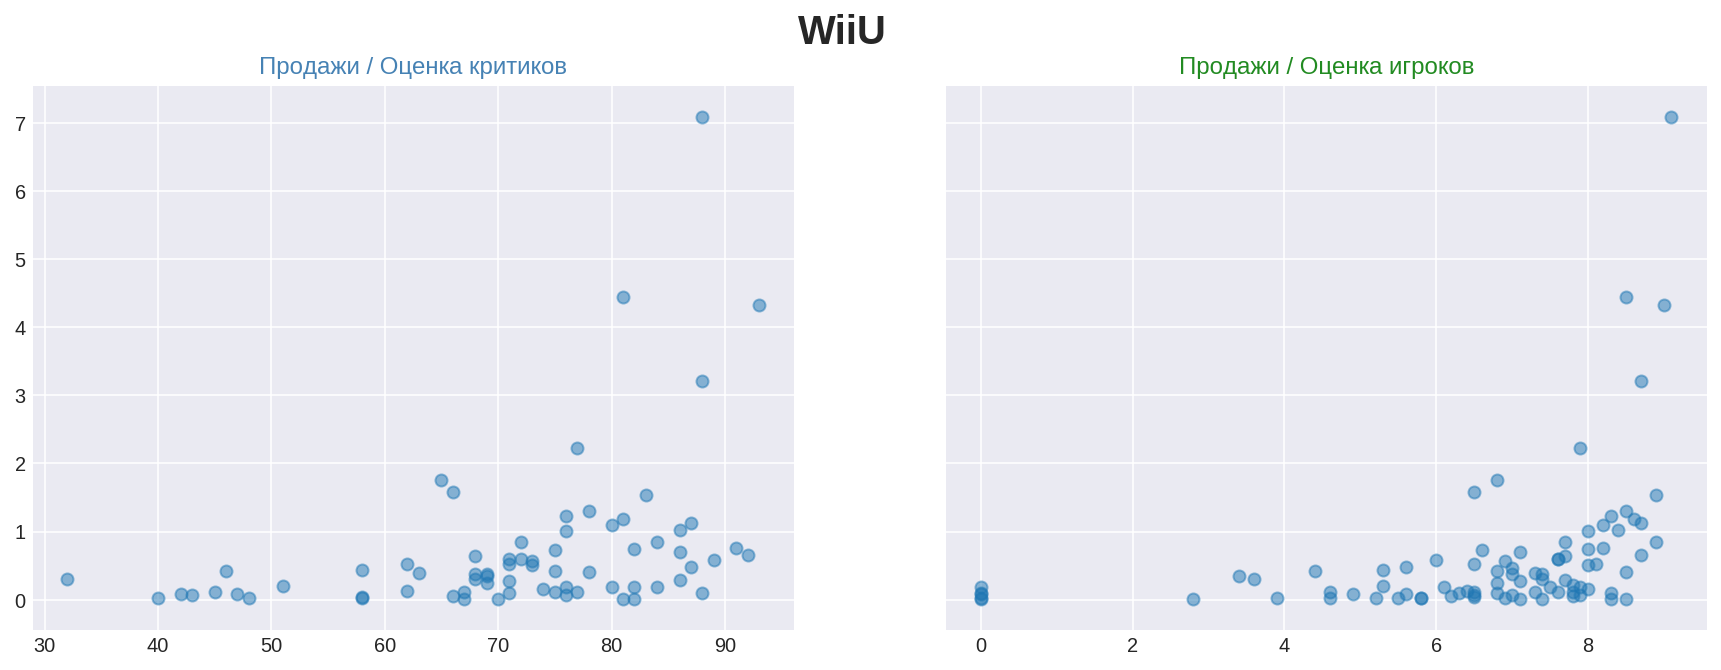

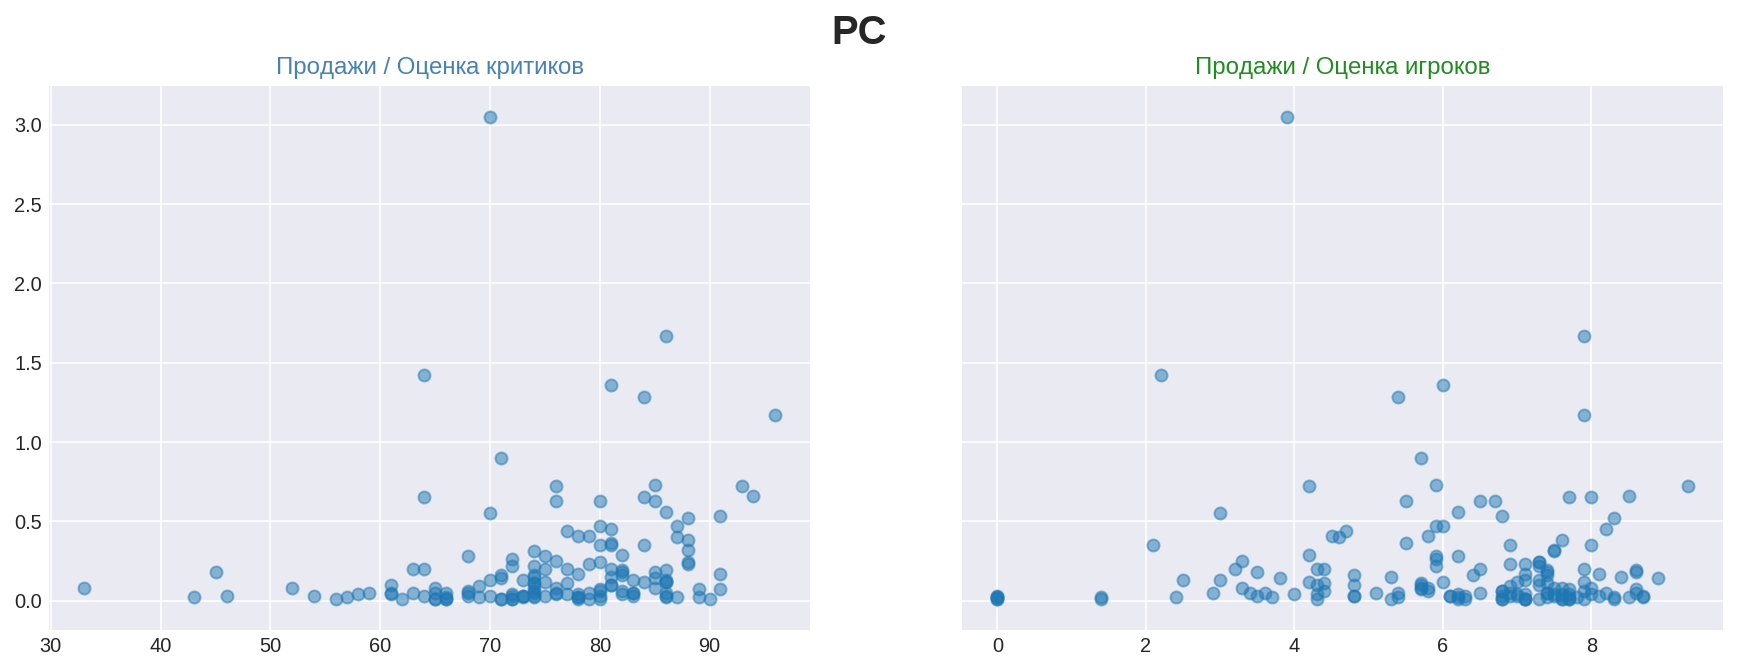

In [33]:
for platform in top_platforms['platform'].unique():
    double_scatter(platform)

Приставки почти полностью совпали между собой: коэффициент корреляции продаж и рейтинга критиков у них очень похожий. У PS4 и XBOX One также похожи и коэффициенты корреляции продаж и рейтинга игроков. У 3DS и WiiU при этом рейтинг игроков сильнее влияет на продажи, чем у других платформ. Возможно, японские игроки, у которых более популярны эти платформы, больше доверяют отзывам пользователей, чем западные игроки. У ПК, это видно и из матрицы корреляции, и из графиков, оценки игроков никак не влияют на продажи. При этом и рейтинг критиков влияет меньше, чем на других платформах.  
  
В целом можно сделать вывод, что оценки пользователей почти не влияют на продажи игр ни на одной платформе, в то время как хороший рейтинг критиков повышает продажи.

Рассмотрим также распределение продаж по жанрам и определим самые популярные.

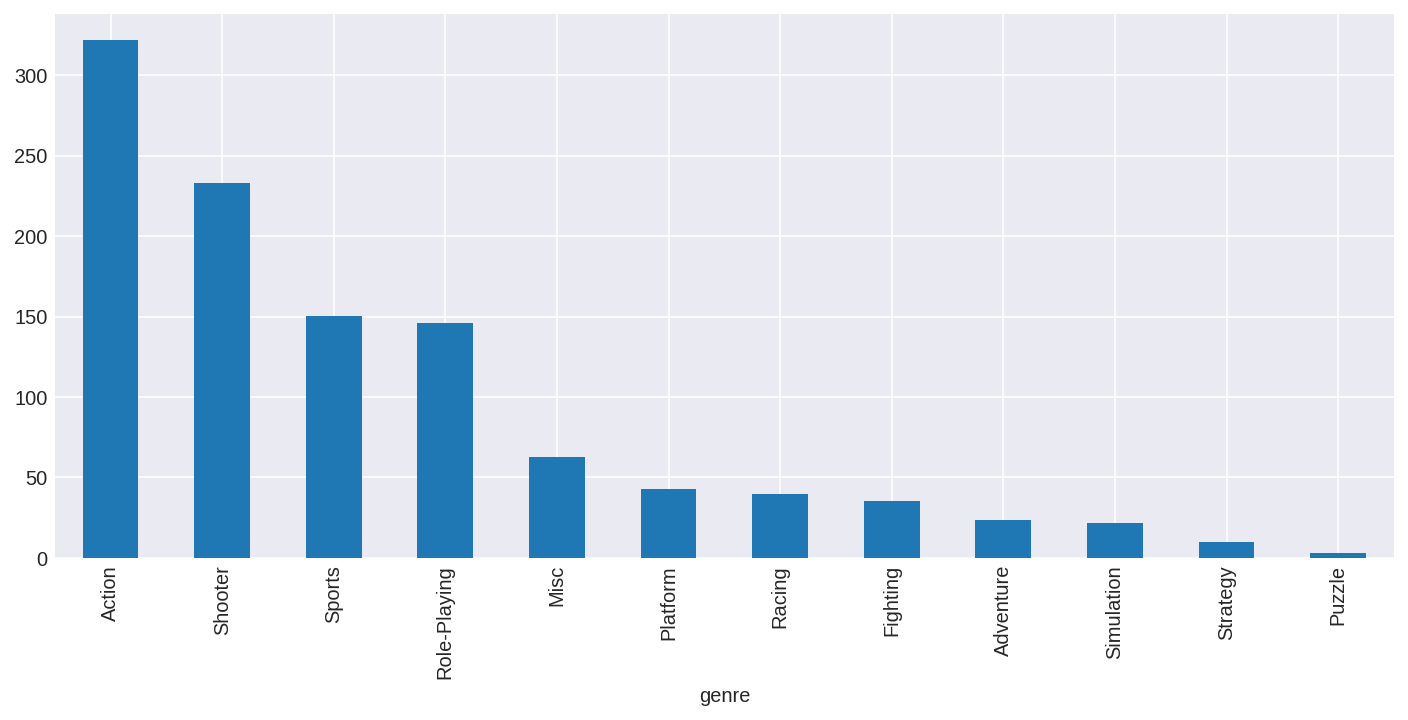

In [34]:
latest.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,5));


Ожидаемо, самые популярные жанры — это экшн, шутеры, спортивные игры и РПГ. Остальные игры продаются сильно хуже.

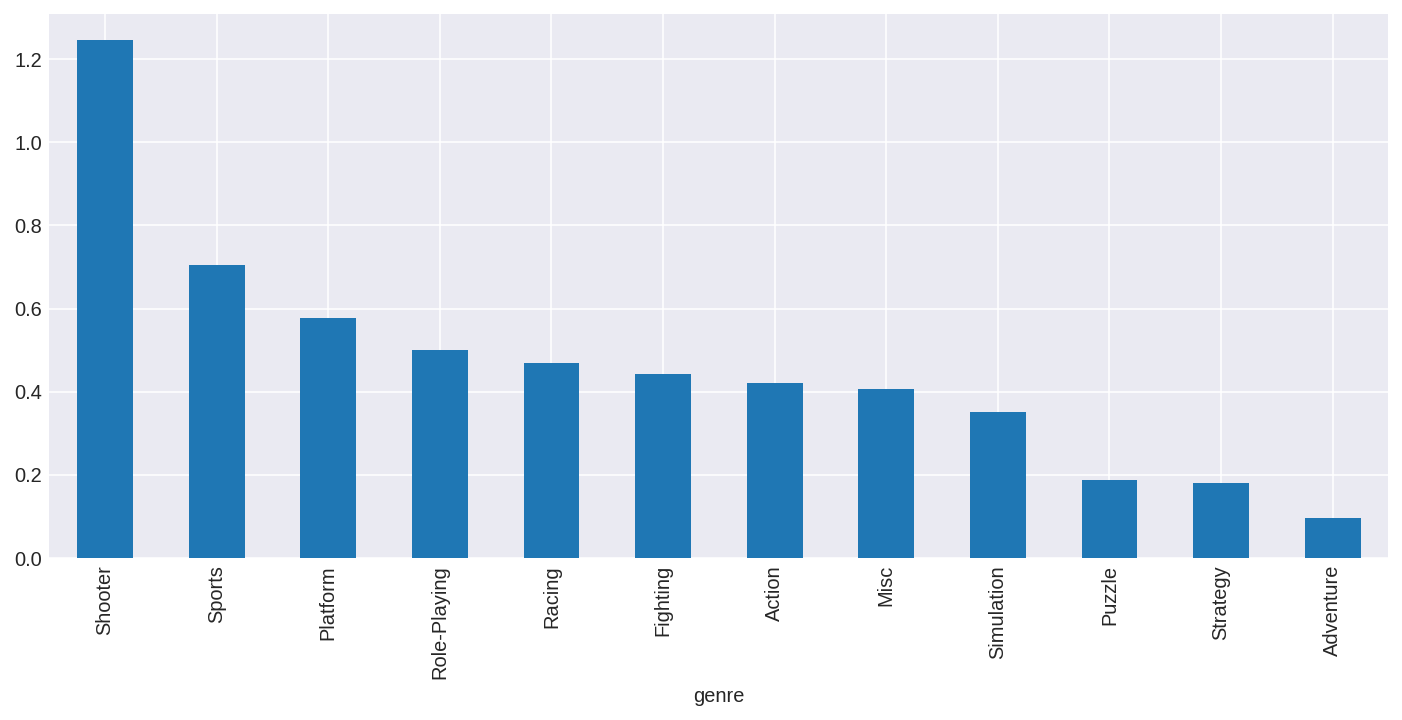

In [35]:
latest.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,5));

Если смотреть на средние продажи, то экшн опускается в топе. Скорее всего, в этом жанре есть несколько очень популярных игр и много непопулярных. А вот шутеры, спортивные игры и РПГ по-прежнему в лидерах. Можно говорить о том, что эти 3 жанра — самые прибыльные.

### Вывод

Общие выводы следующие:
1. Цикл жизни большинства игровых платформ — около 10 лет.
2. Большинство платформ имеют определенные конфигурации, и для них не предусмотрен апгрейд, поэтому они морально устаревают со временем. Возможность кастомизации и апгрейда позволяет персональным компьютерам оставаться актуальными всё время. Тем не менее для игр они намного менее популярны, чем игровые приставки.
3. Актуальный период, который стоит рассматривать для анализа, — время после выхода платформ нового поколения, то есть с 2013 года.
4. В актуальном периоде были популярны 5 платформ — ПК, PS4, XBOX One, 3DS и WiiU.
5. Игры на ПК наименее популярны, зато эта платформа актуальна всегда и переживает все остальные.
6. Игры на PS4 и XBOX One продаются очень похоже.
7. Продажи имеют несильную прямую зависимость от оценок критиков: игры с высоким рейтингом продаются лучше.
8. Пользовательские оценки почти не влияют на продажи игр (влияют только на японском рынке).
9. Для игроков на ПК никакие оценки в целом не важны.
10. Самые популярные жанры: экшн, шутеры, спортивные и РПГ. При этом в жанре экшн есть несколько супер-популярных игр, которые делают продажи для всего сегмента, и много не очень популярных.

<a id='user'></a>

## Портрет пользователя

Чтобы было удобнее рассматривать предпочтения пользователей разных регионов, напишем функцию, которая будет принимать интересующий нас параметр и строить столбчатые диаграммы по каждому региону.

In [36]:
def user_image(value, rot=90): # функция также примет угол наклона подписей столбцов
    regions = {'na_sales': 'Сев. Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'} # создадим словарь для заголовков
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,5)) # создаем фигуру с 3 областями рисования с общей осью y
    for idx, val in enumerate(latest[['na_sales', 'eu_sales', 'jp_sales']]): # переберем в цикле каждый регион
        pivot_data = latest.pivot_table(index=value, values=val) # для каждого региона строим сводную таблицу
        pivot_data_sorted = pivot_data.sort_values(by=val, ascending=False).head() # выбираем топ-5 в регионе
        axes[idx].set_title(regions[val], color='steelblue', fontsize=20) # напишем заголовок
        bar = sns.barplot(x=pivot_data.index, y=val, data=pivot_data, ax=axes[idx]) # построим столбчатую диаграмму
        for item in bar.get_xticklabels(): # зададим угол наклона подписей столбцов
            item.set_rotation(rot)
            if item.get_text() in pivot_data_sorted.index: # выделяем параметр из топ-5
                item.set_fontweight('bold')
                item.set_color('red')

Функция готова. Теперь рассмотрим предпочтения пользователей.

#### Популярные платформы

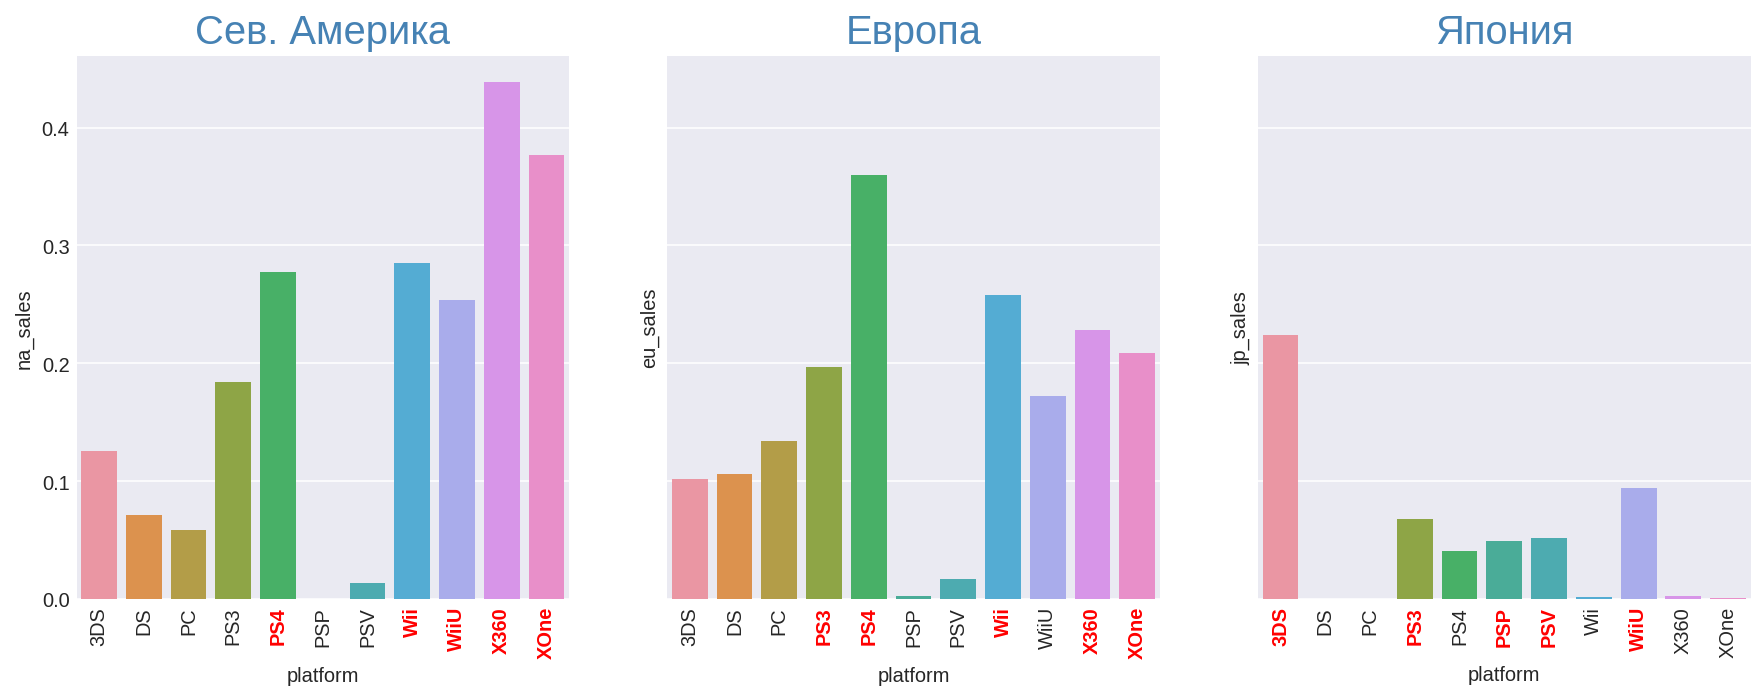

In [37]:
user_image('platform')

Предпочтения игроков из Европы и Северной Америки очень похожи, а вот у японцев они совсем другие. Не входящаа в Европе и Америке даже в топ-5 3DS — самая популярная игровая платформа в Японии. WiiU, PS3 и PS4 относительно популярны во всех регионах, а вот в приставки от Microsoft, также как и на ПК, японские игроки почти не играют. Также в Японии до сих пор популярны портативные приставки: PSP и PS Vita, в которые почти не играют в Европе и Америке. Также видно, что в Европе более популярны приставки Sony, а в Америке — Microsoft.

#### Популярные жанры

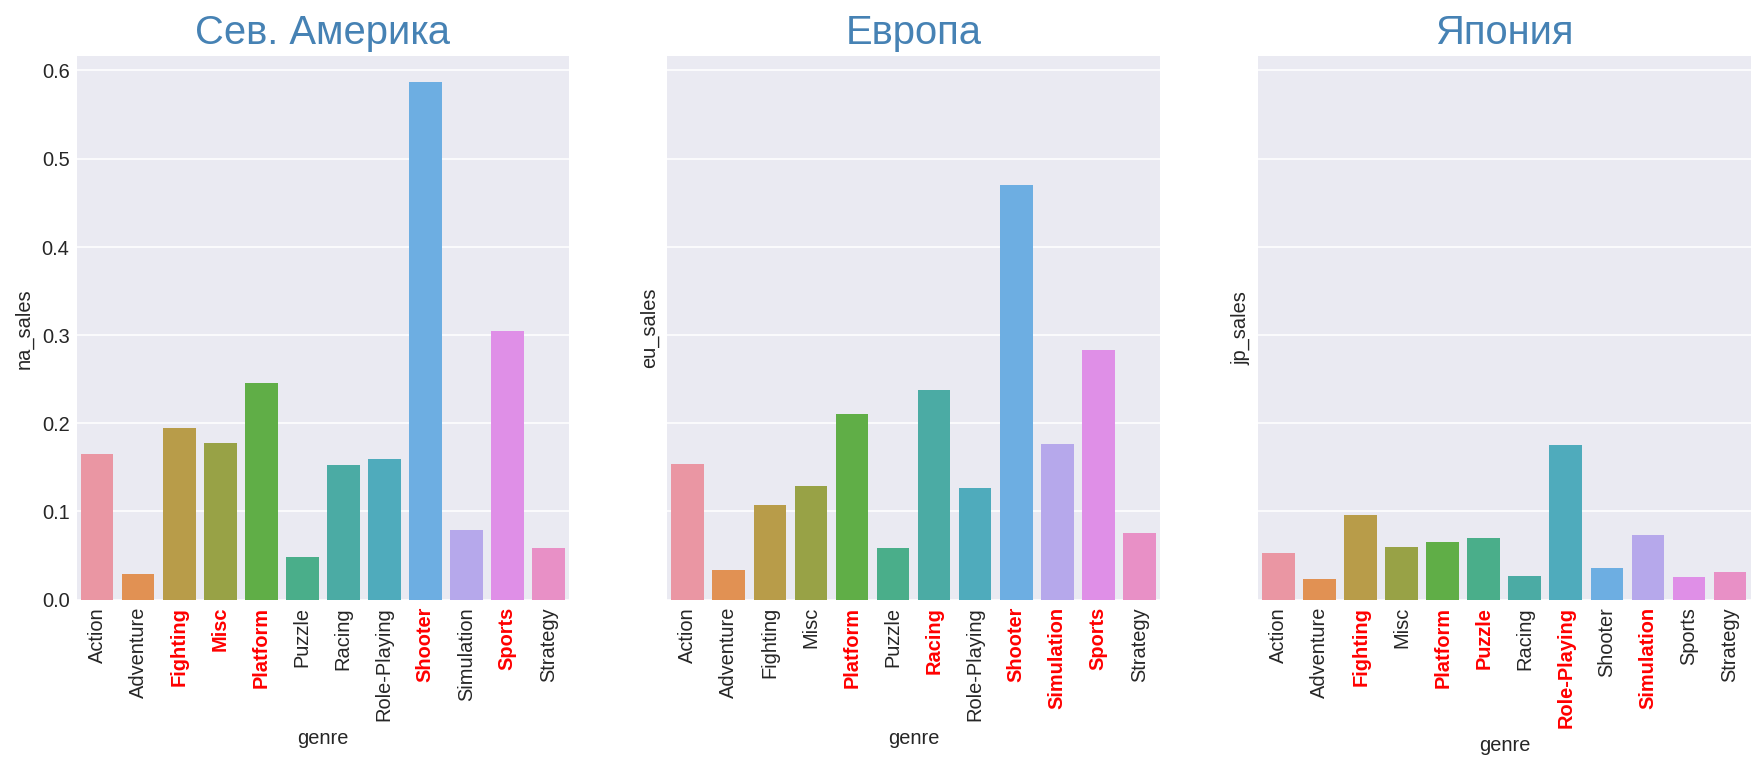

In [38]:
user_image('genre')

Знакомая картина: самые популярные жанры почти полностью совпали у игроков из Европы и Северной Америки, в то время как любимые жанры игроков из Японии сильно выбиваются. РПГ у японцев на первом месте, у западных игроков — на одном из последних. В игры остальных жанров японские игроки играют мало: почти не играют в столь популярные у игроков из Европы и США шутеры и спортивные игры.

#### Влияние рейтинга ESRB на продажи

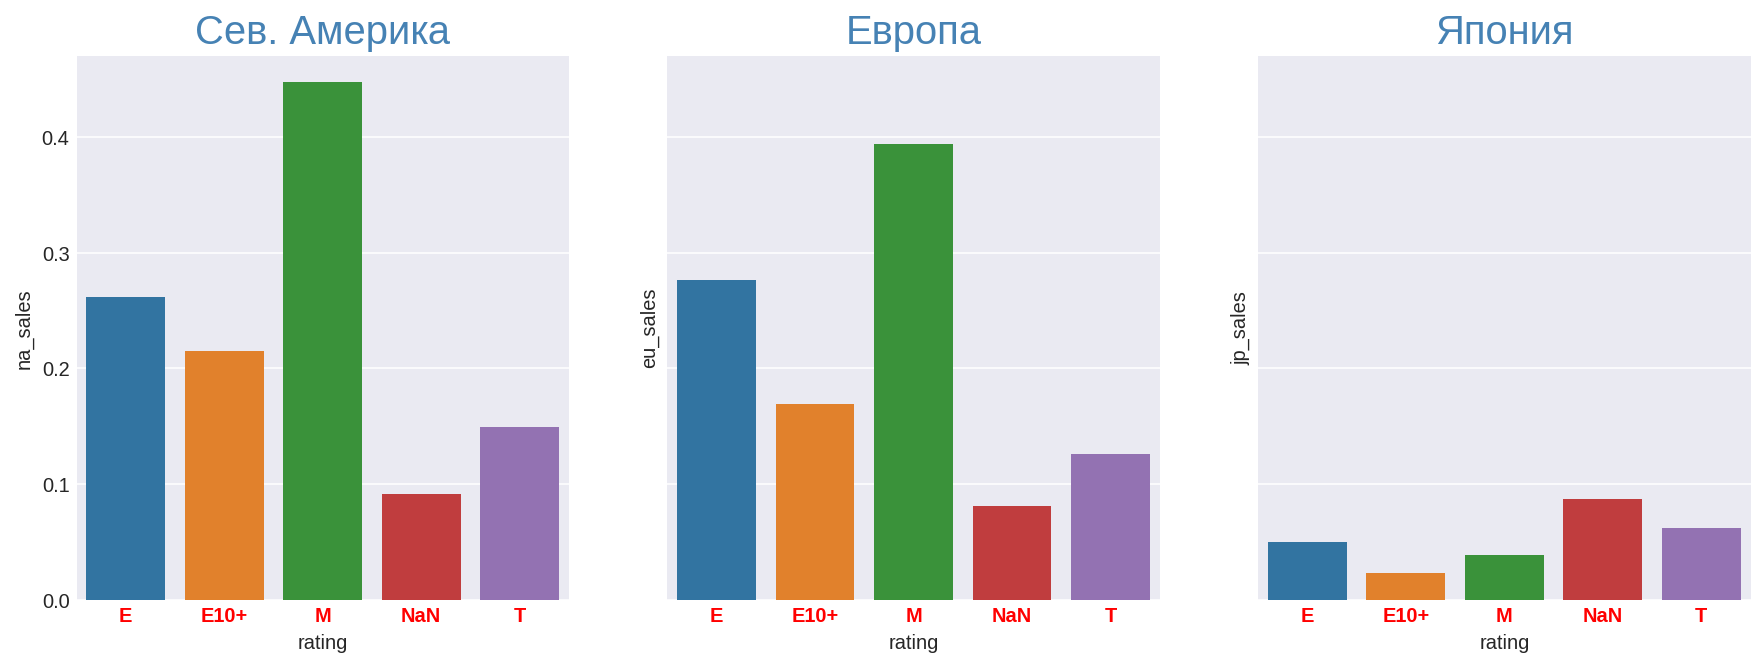

In [39]:
user_image('rating', rot=0)

И снова Америка и Европа показывают очень похожее распределение. Самые популярные игры там — со взрослым рейтингом M (скорее всего потому, что самый популярный жанр — шутеры — чаще всего имеет именно такой рейтинг). На втором месте — игры для всех возрастов. В Японии же самые популярные игры имеют рейтинг, который мы обозначили `NaN`, значение жанра у этих игр было пропущено. В системе ESRB всего 5 разных рейтингов для уже вышедших игр. Среди тех, которые есть в таблице, не хватает рейтинга **AO**, *Adults Only* — «Только для взрослых». Видимо, именно этот жанр — самый популярный у Японских игроков.

### Вывод

Из рассмотренных графиков можно сделать следующие выводы:
1. В Европе и Америке рынки игровой индустрии очень похожи: у игроков близкие предпочтения и платформ (хотя американцы больше любят американские XBOX), и жанров, и даже возрастных рейтингов игр (хотя последний сильно зависит от жанра).
2. Игроки Японии сильно отличаются по своим предпочтениям. Многое из того, что нравится западным игрокам, японцам совсем не нравится.

<a id='hyps'></a>

## Проверка гипотез

#### Гипотеза № 1: «Средние пользовательские рейтинги платформ Xbox One и PC одинаковые».

Нулевая гипотеза всегда подразумевает равенство, поэтому она будет звучать также, как в условии. **Н0:** ***«Средние пользовательские рейтинги платформ Xbox One и PC одинаковые».*** **Альтернативная гипотеза Н1:** ***«Средние пользовательские рейтинги платформ Xbox One и PC отличаются».***  
  
Чтобы проверить гипотезы, напишем функцию, которая будет принимать параметр (жанр, платформу, рейтинг) и две опции, по которым мы хотим взять выборки. Функция будет строить гистограммы выборок и проверять гипотезу о равенстве средних двух генеральных совокупностей при помощи t-критерия Стьюдента. В срез добавим игры с рейтингом больше 0, чтобы избежать перекоса. Игры с рейтингом 0 — это игры с неопределенным рейтингом.

In [40]:
def hyp(parameter, opt1, opt2):
    data1 = latest[(latest[parameter]==opt1) & (latest['user_score']>0)]['user_score'].dropna() #срез по первой опции
    data2 = latest[(latest[parameter]==opt2) & (latest['user_score']>0)]['user_score'].dropna() #срез по второй опции
    if 0.5 < (data1.std()/data2.std()) < 2: # проверяем выборки на равенство стандартных отклонений
        display(st.ttest_ind(data1, data2))
    else: # если стандартные отклонения отличаются, применяем t-критерий Уэлча
        display(st.ttest_ind(data1, data2, equal_var=False))
    data1.hist(bins=50, alpha=0.5) # строим гистограммы двух выборок, чтобы посмотреть на частотное распределение
    data2.hist(bins=50, alpha=0.5);

Ttest_indResult(statistic=1.4788255981357277, pvalue=0.14012658403611647)

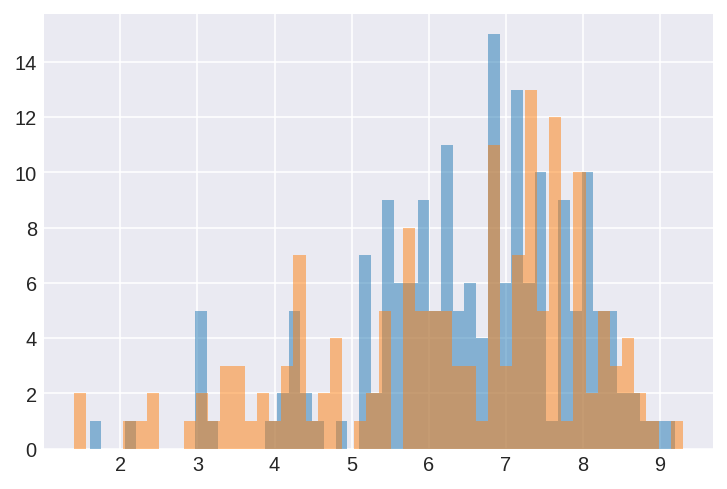

In [41]:
hyp('platform', 'XOne', 'PC')

##### Вывод

На гистограмме видно, что распределение оценок игроков двух платформ имеет схожий вид. Распределение похоже на нормальное, скошенное влево. Пик распределения — около 7 баллов.  
  
T-критерий Стьюдента подтверждает наши догадки: p-значение равно 0.14, что говорит о том, что средние двух выборок с довольно высокой вероятностью равны. Нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, **не получилось отвергнуть.**

#### Гипотеза №2: «Средние пользовательские рейтинги жанров Action и Sports разные».

Гипотеза из условия будет альтернативной, нулевая же гипотеза будет звучать так: **«Средние пользовательские рейтинги жанров Action и Sports одинаковые».**  
  
Проверим гипотезу с помощью t-критерия Стьюдента, для этого используем ранее написанную функцию.

Ttest_indResult(statistic=11.535100577928208, pvalue=1.0517832389140023e-27)

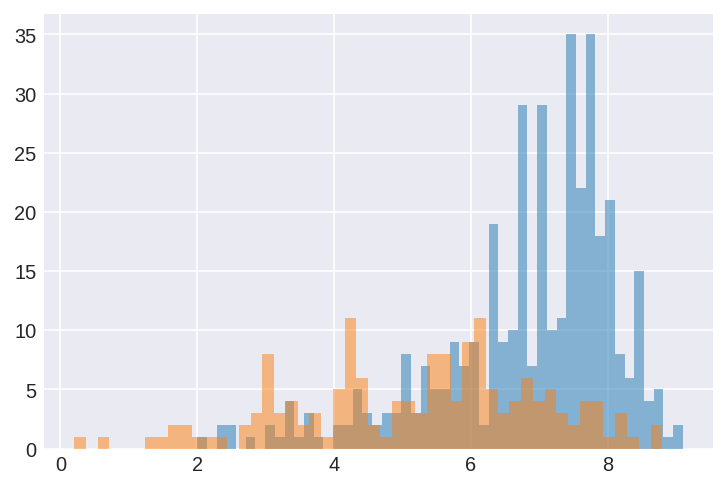

In [42]:
hyp('genre', 'Action', 'Sports')

##### Вывод

На гистограмме видно, что распределения не совпадают и отличаются довольно сильно. Пик распределения оценок экшн-игр — около 7.5, спортивных — между 5 и 6.  
  
t-критерий также говорит о том, что средние оценки двух жанров вряд ли совпадут. p-значение равно 1 в минус 27 степени — это критически мало. Это значит, что вероятность того, что средние значения двух выборок будут равны, крайне мала. Значит, **мы отвергаем нулевую гипотезу** и смело можем говорить о том, что средние пользовательские рейтинги жанров Action и Sports разные.

<a id='conclude'></a>

## Итоговый вывод

В ходе работы над проектом мы создали несколько функций и сводных таблиц, которые помогут проанализировать любые интересующие показатели. Вместо того, чтобы удалять все пропуски, мы последовательно избавлялись только от тех, которые мешали анализу и только тогда, когда данные с пропусками были не нужны. В результате данные были более полными, и нам не пришлось терять больше половины от них.  
  
В результате анализа мы пришли к следующим выводам:
1. Большинство платформ остаются актуальными в течение не больше чем 10 лет. После этого они исчезают с рынка, а примерно в середине их жизненного цикла появляются новые.
2. Персональные компьютеры — исключение, за счёт возможности апгрейда они остаются актуальными всегда, хотя игр для них покупают заметно меньше.
3. Актуальный период для анализа — период с 2013 года, когда появились приставки нового поколения.
4. Оценки критиков сильнее влияют на продажи, чем оценки игроков. Игры с высоким рейтингом критиков продаются бóльшим тиражом.
5. Самые популярные жанры: экшн, шутеры, спортивные и РПГ. При этом в жанре экшн есть несколько супер-популярных игр, которые делают продажи для всего сегмента, и много не очень популярных.
6. Игроки Европы и Северной Америки имеют очень похожие предпочтения: играют в игры одних жанров, на одних платформах и с одним возрастным рейтингом. Игроки из Японии сильно отличаются в предпочтениях, и то, что нравится западным игрокам, японцам не нравится совсем.

Чтобы более объективно судить о предпочтениях пользователей, мы проверили гипотезы о равенстве средних оценок:
1. Гипотезу о равенстве средних оценок игроков ПК и XBOX One отвергнуть не получилось. p-значение получилось довольно большим — около 0.14 — что говорит о том, что средние оценки с большой вероятностью равны.
2. Гипотезу о равенстве средний оценок игр жанра экшн и спортивных пришлось отвергнуть и принять альтернативную гипотезу, которая и была в условии. p-значение экстремально мало и это значит, что почти наверняка средние оценки игр этих двух жанров разные.

Для рекламной кампании самыми перспективными будут игры:
1. Для PS4 и XBOX One (в Японии стоит сделать отдельную рекламу игр для 3DS).
2. В жанре шутер и спортивные (в Японии — РПГ).